<p class="h2 display-4 text-center">中国矿业大学（北京）</p>
<p class="h2 display-4 text-center">2022-2023学年第1学期本科课程线上考核（A卷）</p>
<hr class="my-4">
<p class="h4">课程名称：量化交易理论</p>
<p class="h4">课程性质：专业选修课</p>
<p class="h4">任课教师：李岩</p>

<p class="h4">学院班级：</p>

<p class="h4">姓名：</p>

<p class="h4">学号：</p>

<hr class="my-4">
<p class="h4">评分区域（由阅卷老师填写）</p>
<p class="h2">总分：</p>
<p class="h2">评分人：</p>

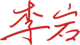

<hr class="my-4">
<p class="text text-danger text-center" style="font-size:20pt">答题要求</p>

1. 答题时间<font color="red"><strong>48小时</strong></font>，从2022年12月30日08:00 $\to$ 2023年01月01日08:00。
2. 答题完毕后在学习通上传答案，须提交`.ipynb`文件
3. 题目具有研究性质，综合运用所学知识尽可能得到更好的结果。
4. 每道题的解答须写出**必要**的步骤和过程，在每道题目后面增加单元格解答。
5. 凡是涉及到`random_state`的，`random_state`的取值为个人学号的**后三位**构成的整数。
6. 凡是涉及到划分训练集、检验集的，检验集的比例为$(\text{学号}\textbf{后三位}\text{构成的整数}+100)/1000$。例如，如果学号**后三位**是202，则检验集的比例是$(202+100)/1000=0.302$
7. 运算结果保留**三位小数**。
8. 可以查询有关资料，但须**个人独立**完成。一旦发现提交文档完全一样的情况，均视作0分处理。
<hr class="my-4">

<p class="lead"><b>现有若干股票数据，数据格式为<code>.csv</code></b></p>，股票名称与代码见下表：

|序号|股票|代码|
|:---:|:---:|:---:|
|0|华能国际|600011|
|1|华夏银行|600015|
|2|三一重工|600031|
|3|东风汽车|600006|
|4|中国神华|601088|
|5|中煤能源|601898|
|6|中信证券|600030|
|7|中国船舶|600150|
|8|工商银行|601398|

- 利用下个单元格的代码获取需要分析的两只只股票**对应的序号**（序号见上表）。其中，令`random_state`的值更改为你的**学号后三位数字**
    - 例如，学号后三位为102，则令`random_state=102`
- 后续所有问题均针对**获取的两只股票**展开。

In [ ]:
# 请运行该单元格，获取股票序号
import pandas as pd
stId = input('输入学号后三位：')
idx = pd.Series(range(9)).sample(2, random_state=int(stId))
print(f'获取的股票序号为{idx.values}')

# 原始数据处理（计20分）

- 读入两只标的数据存储成`DataFrame`格式，将日期列转换为时间格式，提取年月日，并将其设置为该`DataFrame`的`index`，删除两个数据中的`amount`和`open_interest`两列。（**5分**）
- 给出两个数据集中的**开盘价、最高价、最低价、收盘价、成交量**的均值、标准差、最大值、最小值。（**5分**）
- 两只股票各有哪些天是全天涨停、哪些天是全天跌停？（**5分**）
    - 提示：全天涨停或跌停的特征是当天的最高价和最低价相等

# 合约数据可视化展示（计20分）

- 在选定的两只股票中，任选一只绘制**2020年以来**标的日度k线图，在k线图上绘制30日和120日均线，绘制相应时间段内的`ATR`指标（ATR的时间窗口是20天），并以副图形式显示，同时在副图上显示成交量。(**10分**)
- 从两只股票的第一个交易日起各建立1手多头仓位并一直持有，绘制两只股票每日收益率(用收盘价计算)的直方图，并计算在99\%置信度下的最大亏损各是多少。(**10分**)
    - 提示1：直方图利用`pandas`的绘图方法，即`df.plot(kind='hist',bins=30)`
    - 提示2：最大亏损计算用VaR。假设每只股票各有10万元的初始资金


# 多因子模型选股（计30分）

- 读取Famma-French三因子数据和无风险利率数据（**计5分**）
    - Famma-French数据为`RESSET_THRFACDAT_DAILY.csv`
    - 无风险利率数据为`shibor.csv`
    - 提示：用横向合并三因子数据与无风险利率数据（连接方式为`inner`）
- 构建并计算所选两只股票的Famma-French三因子模型（**计15分**）
    - 无风险利率用银行间三个月拆借利率`shibor3M`
- 假设采用多因子模型选股，这两只股票是否应当加入到股票池中？为什么？（**计10分**）

In [10]:
import numpy as np
import pandas as pd
ff = pd.read_csv('RESSET_THRFACDAT_DAILY.csv',encoding='GB2312')
sb=pd.read_csv('shibor.csv',encoding='GB2312')
print(ff.head())
print(sb.head())


    日期_Date  市场溢酬因子__总市值加权_Rmrf_mc  市值因子__总市值加权_Smb_mc  账面市值比因子__总市值加权_Hml_mc
0  1992/7/1                -0.0291              0.0098                 0.0017
1  1992/7/2                -0.0039              0.0198                 0.0270
2  1992/7/3                 0.0159              0.0001                -0.0127
3  1992/7/6                -0.0082              0.0668                -0.2120
4  1992/7/7                 0.0030              0.0374                -0.0056
         date  shiborON  shibor1W  shibor2W  shibor1M  shibor3M  shibor6M  \
0  2012-01-04    3.4975    4.0208    4.6758    5.9133    5.4655    5.4243   
1  2012-01-05    4.0000    4.5042    4.9192    5.8494    5.4615    5.4224   
2  2012-01-06    3.9979    4.3008    4.6192    5.9483    5.4600    5.4214   
3  2012-01-09    4.0000    4.5083    4.5583    5.9351    5.4602    5.4203   
4  2012-01-10    3.6933    4.1017    4.5542    5.9339    5.4616    5.4218   

   shibor9M  shibor1Y  
0    5.2417    5.2364  
1    5.2420    5.2376

# 利用机器学习算法预测收益率（计30分）

- 在给定的两只股票中，**任选一只完成本题目**
- 将上题计算的**每日收益率**按照**大于0和小于等于0**分成两类，形成类别标签。（**5分**）
- 读入该只股票对应的PE、OBV20、CCI20、MOMENTUM3M、REVS10、BETA21、CAPMALPHA21预测属性，并进行MinMax标准化。（**10分**）
    - 因子数据文件名称为`股票代码-factors.csv`
- 以上述因子为预测属性，构建机器学习模型，预测**下一个交易日**的收益率涨跌情况，并检验该分类模型效果。（**15分**）
    - 检验集的比例按照**答题要求第6点**设置
    - 学号末尾为**奇数**的选用**随机森林**算法
    - 学号末尾为**偶数**的选用**AdaBoosting**算法